In [1]:
import torch

# Create tensors
x = torch.tensor([2.0, 3.0], requires_grad=True)

# Define a simple function
y = x[0]**2 + 3 * x[1]

# Compute gradients
y.backward()

# Derivatives
print("∂y/∂x0:", x.grad[0])
print("∂y/∂x1:", x.grad[1])


∂y/∂x0: tensor(4.)
∂y/∂x1: tensor(3.)


In [2]:
x = torch.tensor([5.0], requires_grad=True)
y = x ** 3 + 2 * x ** 2 - x
y.backward()
print("Derivative dy/dx at x=5:", x.grad.item())


Derivative dy/dx at x=5: 94.0


In [3]:
import torch
import torch.nn as nn

class SimpleLinearNet(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, output_dim)  # 1-layer linear

    def forward(self, x):
        out = self.fc1(x)
        print("Output at layer:", out)   # Visualize outputs
        return out

# Example usage
net = SimpleLinearNet(4, 2)
dummy_input = torch.randn(1, 4)
output = net(dummy_input)


Output at layer: tensor([[-0.0488, -0.4063]], grad_fn=<AddmmBackward0>)


In [4]:
x = torch.tensor([2.0], requires_grad=True)
y = torch.sin(x) * torch.exp(x)
y.backward()
print("Derivative dy/dx at x=2.0:", x.grad.item())


Derivative dy/dx at x=2.0: 3.6439173221588135


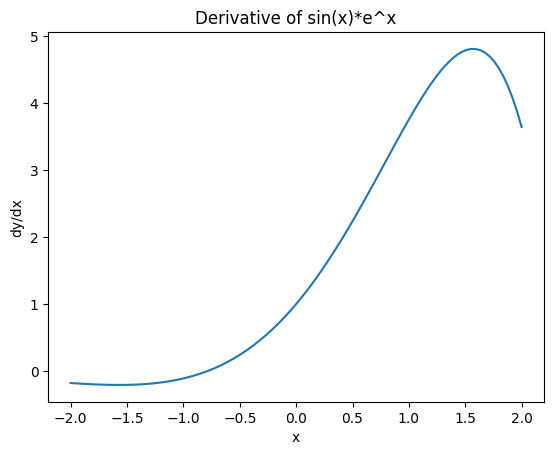

In [5]:
import matplotlib.pyplot as plt

x_vals = torch.linspace(-2, 2, 100)
y_vals = torch.sin(x_vals) * torch.exp(x_vals)
grad_vals = []

for x in x_vals:
    x_ = torch.tensor([x.item()], requires_grad=True)
    y_ = torch.sin(x_) * torch.exp(x_)
    y_.backward()
    grad_vals.append(x_.grad.item())

plt.plot(x_vals.numpy(), grad_vals)
plt.title("Derivative of sin(x)*e^x")
plt.xlabel("x")
plt.ylabel("dy/dx")
plt.show()


In [6]:
class SimpleLinearNet(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, output_dim)
        self.relu = nn.ReLU()

    def forward(self, x):
        out = self.fc1(x)
        print("Output after linear:", out)
        out = self.relu(out)
        print("Output after ReLU:", out)
        return out
